
# Andrew Ng Assignment 1 (Week 2)

### Univariate Linear regression


In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv("ex1data1.txt", header=None, names = ["Population", "Profit" ])

In [177]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [178]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Vs Population')

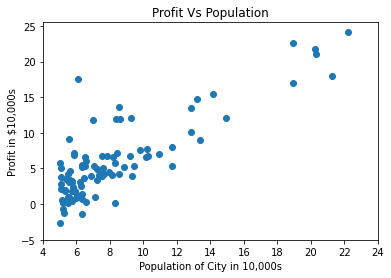

In [179]:
plt.scatter(data["Population"],data["Profit"])
plt.xticks(np.arange(4,25,step=2))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Profit Vs Population")

In [180]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function     
    of using theta as parameter in a linear regression model
    """
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [181]:
m = len(data)

In [182]:
data.insert(0,"bias",np.ones((m,1)))

In [183]:
X = data[["bias", "Population"]]
y = data[["Profit"]]
theta=np.zeros((2,1))

computeCost(X.values,y.values,theta)

32.072733877455676

In [184]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   
    num_iters gradient steps with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """

    m = len(y)
    J_history=[]

    for i in range(num_iters):
        predictions = X.dot(theta)
        delta = (np.dot(X.transpose(),(predictions -y)))/m
        theta -= alpha * delta
        J_history.append(computeCost(X,y,theta))
    
    return theta,J_history
  


In [185]:
theta,J_history = gradientDescent(X.values,y.values,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


Text(0.5, 1.0, 'Profit Vs Population')

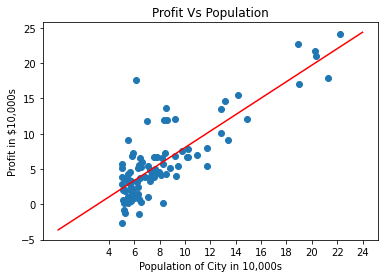

In [186]:
plt.scatter(data["Population"],data["Profit"])
x_value = list(range(25))
y_value = [y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(4,25,step=2))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Profit Vs Population")

#### Visualizing J(θ) 
plot the cost over a 2-dimensional grid of θ values




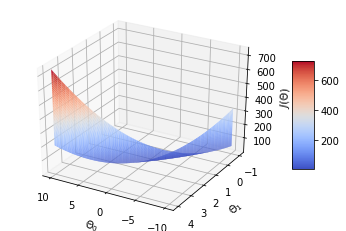

In [187]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize J_vals to a matrix of 0's
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
#        t = np.array([theta0_vals[i],theta1_vals[j]])
        t = np.array([theta0_vals[i],theta1_vals[j]]).reshape(2,1)
        J_vals[i,j] = computeCost(X.values,y.values,t)

#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

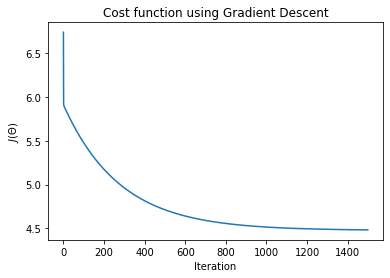

In [188]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Multivariate Linear regression

In [189]:
data2=pd.read_csv("ex1data2.txt", header=None, names = ["Size", "Bedrooms", "Price" ])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [190]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


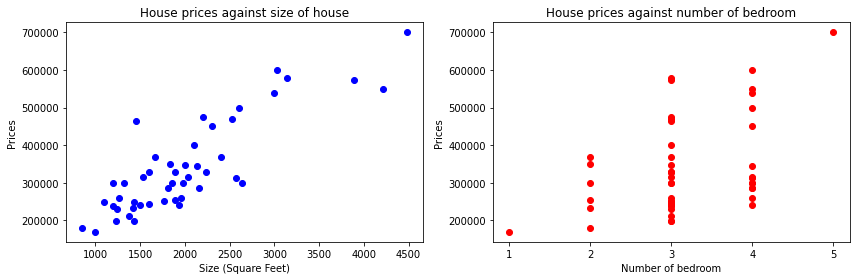

In [191]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(data2["Size"],data2["Price"],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data2["Bedrooms"],data2["Price"],color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")
# Enhance layout
plt.tight_layout()

In [192]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [193]:
m2 = len(data2)
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [194]:
X2 = data2[["Size", "Bedrooms"]]
X2, mean_X2, std_X2 = featureNormalization(X2)
X2.insert(0,"bias",np.ones((m2,1)))
y2 = data2[["Price"]]
theta2=np.zeros((3,1))
X2.head()

,bias,Size,Bedrooms
0,1.0,0.131415,-0.226093
1,1.0,-0.509641,-0.226093
2,1.0,0.507909,-0.226093
3,1.0,-0.743677,-1.554392
4,1.0,1.271071,1.102205


In [195]:
theta2, J_history2 = gradientDescent(X2.values,y2.values,theta2,0.01,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =334302.06 + 99411.45x1 + 3267.01x2


Text(0.5, 1.0, 'Cost function using Gradient Descent')

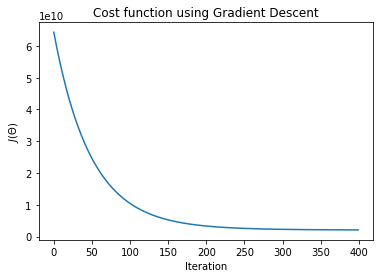

In [196]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Not my test:

In [197]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

In [198]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

For size of house = 1650, Number of bedroom = 3, we predict a house value of $430447.0
